In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression

In [ ]:
!pip install opencv-python

!pip install opencv-contrib-python

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cake.png to cake (3).png
Saving cart_1.png to cart_1 (4).png
Saving cart_2.png to cart_2 (4).png
Saving chips.png to chips (3).png
Saving makenzi.png to makenzi (3).png
Saving maxi.png to maxi (3).png
Saving milk.png to milk (3).png
Saving oil.png to oil (3).png
Saving pepci.png to pepci (3).png
Saving peril.png to peril (3).png
Saving shampo.png to shampo (3).png
Saving tea.png to tea (3).png
Saving tiny cake.png to tiny cake (3).png
Saving tothpaste.png to tothpaste (3).png


In [2]:
objects={0: 'Tiny cake', 1: 'Maxi', 2: 'Makenzi', 3: 'Pepci', 4: 'Tea', 5: 'Shampoo', 6: 'Milk',
         7: 'Oil', 8: 'cake', 9: 'Peril', 10: 'Toothpaste', 11: 'Chips' }
price=[5000, 6000, 40000, 6500, 144000, 139000,30000, 108000, 8000, 83000, 50000, 36000]

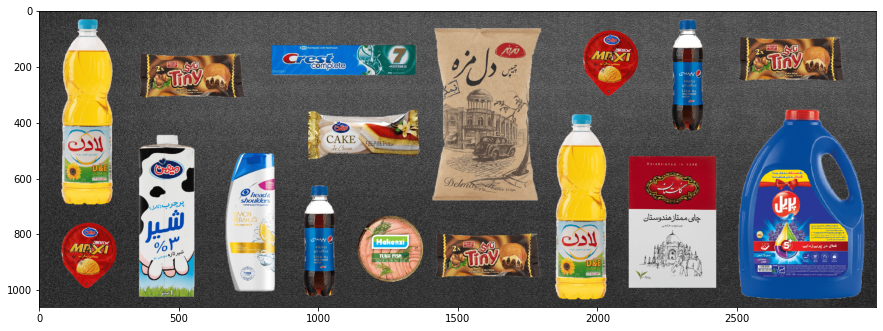

In [3]:
img1 = cv2.imread('cart_1.png')

img1 = cv2.cvtColor(img1[70:1130,],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img1)

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

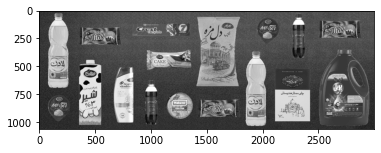

In [5]:
img_binary = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(img_binary, cmap='gray')

In [6]:
img_BW = img_binary.copy()
for i in range(img_binary.shape[0]):
  for j in range(img_binary.shape[1]):
    if img_BW[i][j] >= 40:
      img_BW[i][j] = 255
    elif img_BW[i][j] <= 40:
      img_BW[i][j] = 0

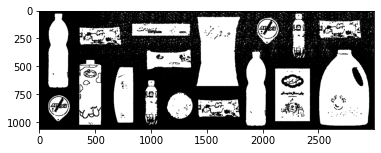

In [7]:
gradient1 = cv2.morphologyEx(img_BW, cv2.MORPH_GRADIENT, kernel)
gradient1 = np.subtract(gradient1, np.ones(gradient1.shape, np.uint8))
plt.imshow(gradient1, cmap='gray')

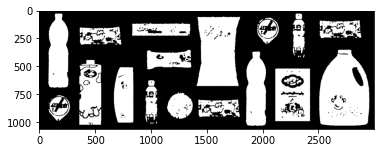

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 7))
opening1 = cv2.morphologyEx(gradient1, cv2.MORPH_OPEN, kernel)
plt.imshow(opening1, cmap='gray')

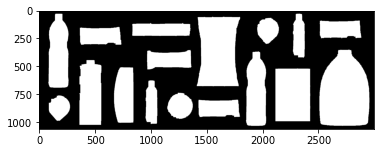

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
closing1 = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel)
closing1 = np.multiply(np.subtract(closing1, 254), 255)
plt.imshow(closing1, cmap='gray')

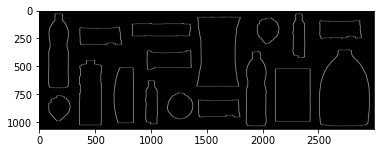

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 2))
result_a = cv2.morphologyEx(closing1, cv2.MORPH_GRADIENT, kernel)
result_a = cv2.morphologyEx(result_a, cv2.MORPH_GRADIENT, kernel)

plt.imshow(result_a, cmap='gray')

In [11]:
contours, hierarchy = cv2.findContours(closing1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('the total number of objects in cart are : ', len(contours))

the total number of objects in cart are :  17


#B)

In [12]:
def templateMatching (img_rgb_,template, threshold= 0.52) :
  number =[]
  for tem in template:
    #run the templae matching
    img_gray_noisy = cv2.cvtColor(img_rgb_, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(img_gray_noisy,tem,cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)
    f = set()
    #mark the corresponding location(s)
    w, h = tem.shape
    for pt in zip(*loc[::-1]):
      cv2.rectangle(img_rgb_, pt, (pt[0] + h, pt[1] + w), (0, 255, 0), 5)
      sensitivity = 150
      f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))
    number.append(len(f))
  return img_rgb_ , number

The number of Tiny cake are:  3


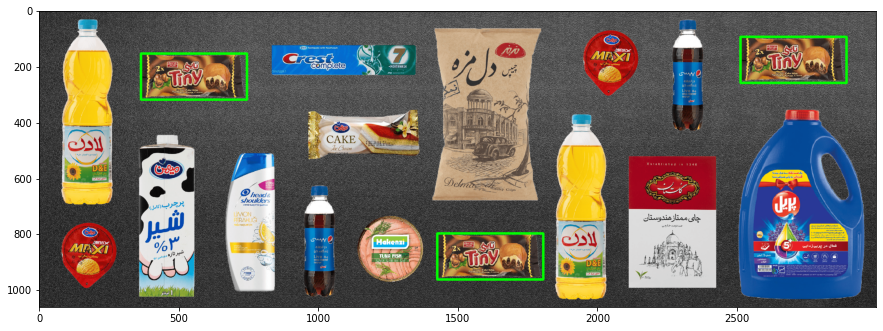

In [14]:
img_tiny_cake= cv2.imread('tiny cake.png')
img_tiny_cake=cv2.cvtColor(img_tiny_cake,cv2.COLOR_BGR2GRAY)
img_rgb_0, count = templateMatching(img1.copy(),  [img_tiny_cake], threshold=0.72)
print('The number of {} are:  {}'.format(objects[0], count[0]))
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb_0)

#C)

The number of Milk are:  1
The number of Pepci are:  2
total price is :  43000


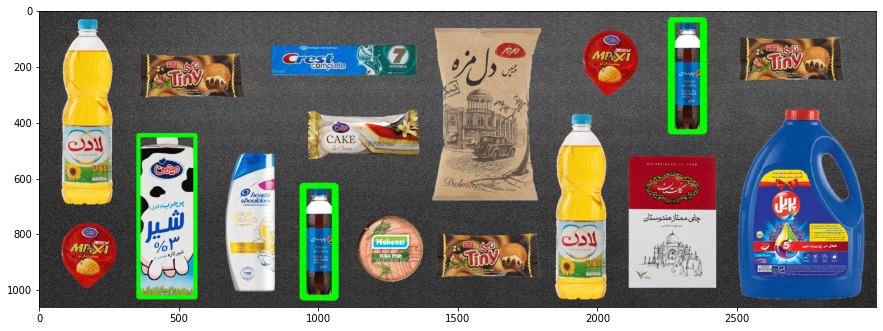

In [239]:
img_milk= cv2.imread('milk.png')
img_milk=cv2.cvtColor(img_milk,cv2.COLOR_BGR2GRAY)
img_pepci= cv2.imread('pepci.png')
img_pepci=cv2.cvtColor(img_pepci,cv2.COLOR_BGR2GRAY)

img_rgb_0, count = templateMatching(img1.copy(),  [img_milk,img_pepci], threshold=0.72)
print('The number of {} are:  {}'.format(objects[6], count[0]))
print('The number of {} are:  {}'.format(objects[3], count[1]))
plt.figure(figsize=(15, 10))

total_price = price[6] * count[0] +  price[3] * count[1] 
print ('total price is : ', total_price)
plt.imshow(img_rgb_0)



#D)

The number of Milk are:  1
The number of Maxi are:  1
The number of cake are:  1
total number is :  3


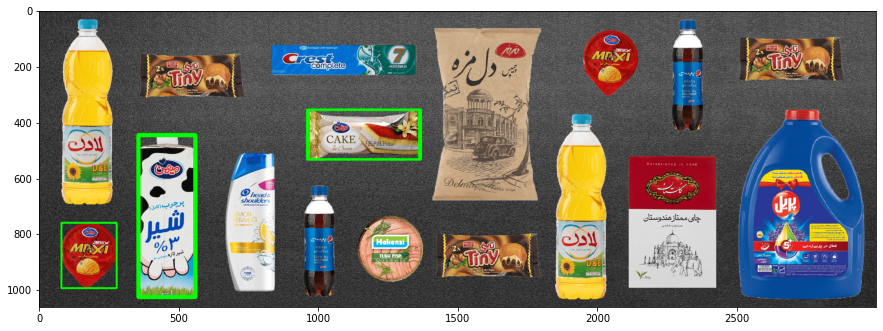

In [ ]:
img_maxi= cv2.imread('maxi.png')
img_maxi=cv2.cvtColor(img_maxi,cv2.COLOR_BGR2GRAY)
img_cake= cv2.imread('cake.png')
img_cake=cv2.cvtColor(img_cake,cv2.COLOR_BGR2GRAY)


img_rgb_0, count = templateMatching(img1.copy(),  [img_milk,img_maxi,img_cake], threshold=0.72)
print('The number of {} are:  {}'.format(objects[6], count[0]))
print('The number of {} are:  {}'.format(objects[1], count[1]))
print('The number of {} are:  {}'.format(objects[8], count[2]))
plt.figure(figsize=(15, 10))

total_number =count[0] +  count[1] +  count[2] 
print ('total number is : ', total_number)
plt.imshow(img_rgb_0)



#E)

The number of Tiny cake are:  3
The number of Maxi are:  1
The number of Makenzi are:  1
The number of Pepci are:  2
The number of Tea are:  2
The number of Shampoo are:  1
The number of Milk are:  1
The number of Oil are:  2
The number of cake are:  1
The number of Peril are:  1
The number of Toothpaste are:  1
The number of Chips are:  1
total number is :  17


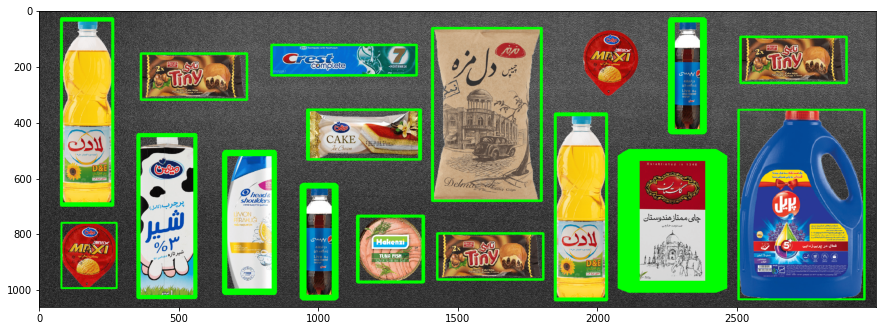

In [ ]:
img_makenzi= cv2.imread('makenzi.png')
img_makenzi=cv2.cvtColor(img_makenzi,cv2.COLOR_BGR2GRAY)
img_tea= cv2.imread('tea.png')
img_tea=cv2.cvtColor(img_tea,cv2.COLOR_BGR2GRAY)
img_shampo= cv2.imread('shampo.png')
img_shampo=cv2.cvtColor(img_shampo,cv2.COLOR_BGR2GRAY)
img_oil= cv2.imread('oil.png')
img_oil=cv2.cvtColor(img_oil,cv2.COLOR_BGR2GRAY)
img_peril= cv2.imread('peril.png')
img_peril=cv2.cvtColor(img_peril,cv2.COLOR_BGR2GRAY)
img_toothpaste= cv2.imread('tothpaste.png')
img_toothpaste=cv2.cvtColor(img_toothpaste,cv2.COLOR_BGR2GRAY)
img_chips= cv2.imread('chips.png')
img_chips=cv2.cvtColor(img_chips,cv2.COLOR_BGR2GRAY)

img_rgb_0, count = templateMatching(img1.copy(),  [img_tiny_cake,img_maxi,img_makenzi, img_pepci, img_tea, img_shampo,img_milk,img_oil, img_cake, img_peril, img_toothpaste,img_chips ], threshold=0.72)
print('The number of {} are:  {}'.format(objects[0], count[0]))
print('The number of {} are:  {}'.format(objects[1], count[1]))
print('The number of {} are:  {}'.format(objects[2], count[2]))
print('The number of {} are:  {}'.format(objects[3], count[3]))
print('The number of {} are:  {}'.format(objects[4], count[4]))
print('The number of {} are:  {}'.format(objects[5], count[5]))
print('The number of {} are:  {}'.format(objects[6], count[6]))
print('The number of {} are:  {}'.format(objects[7], count[7]))
print('The number of {} are:  {}'.format(objects[8], count[8]))
print('The number of {} are:  {}'.format(objects[9], count[9]))
print('The number of {} are:  {}'.format(objects[10], count[10]))
print('The number of {} are:  {}'.format(objects[11], count[11]))

plt.figure(figsize=(15, 10))

print ('total number is : ', np.sum(count))
plt.imshow(img_rgb_0)